 # Linear Regression

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, cross_validation, neighbors

from sklearn.neighbors import KNeighborsClassifier

# Manipulate Data Train

In [3]:
train = pd.read_csv("D:/Master ML/1-First Semester/4- Data Analysis Tools/7-kaggle_practice/kaggle_practice/train.csv")

train.drop (['MSZoning' , 'Street' , 'Alley', 'LotShape', 'LandContour' , 'Utilities' , 'LotConfig' , 'LandSlope' , 'Neighborhood',
            'Condition1' , 'Condition2', 'BldgType' , 'HouseStyle' , 'RoofStyle' , 'RoofMatl' , 'Exterior1st',
             'Exterior2nd' , 'MasVnrType' , 'ExterQual' , 'ExterCond' , 'Foundation' , 'BsmtQual' , 'BsmtCond' ,
             'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'Heating' , 'HeatingQC' , 'CentralAir' , 'Electrical' ,
             'KitchenQual' , 'Functional' , 'FireplaceQu' , 'GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond' , 
             'PavedDrive' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'SaleCondition','Id','SaleType'
            ] , 1 , inplace = True)


train = train.replace(0, np.NaN)  # mark zero values as missing or NaN
train.fillna(0, inplace=True)
#train.dropna(inplace=True)       # mark zero values as missing or NaN  .fillna(0) - df.fillna(0)
print(train.shape)                # summarize the number of rows and columns in the dataset

train.columns = train.columns.str.lower()  # Solving Error : DataFrame' object has no attribute 'to_numeric

train.replace('NA', -99999 , inplace =True)

(1460, 37)


# Proceeding Functions

In [24]:
x= np.array(train.drop(['saleprice'], 1))      # features
y= np.array(train['saleprice'])                # target

o = x_train, x_test , y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2 , random_state = 5)

LR = linear_model.LinearRegression()

In [25]:
fit = LR.fit(x_train, y_train)                # Fit - x , y Train
predxTest = fit.predict(x_test)               # Predict - x Test - y_pred

In [26]:
r2 = r2_score(y_test, predxTest)              # Score - Coefficient of determination
mse = mean_squared_error(y_test, predxTest)   # Mean Square Error

In [27]:
print ("R2 Score Test - Accuracy Test : " , r2)
print ("Mean Square Error : " , mse)

R2 Score Test - Accuracy Test :  0.829410384192
Mean Square Error :  1107127732.24


In [55]:
cv = cross_validation.cross_val_score(LR, x, y)
print ("CV Score : Mean = %.7g | Std = %.7g | Min = %.7g | Max = %.7g" %
      (np.mean(cv),np.std(cv),np.min(cv),np.max(cv)))

CV Score : Mean = 0.7826721 | Std = 0.06050657 | Min = 0.7026349 | Max = 0.8489033


In [19]:
coefficients=  regr.coef_                     # a
intercept = regr.intercept_                   # b

In [21]:
print('Coefficients: \n', coefficients)                 # a = slope Coefficients
print ('\nIntercept: ' , intercept)                     # b = y-intercept

Coefficients: 
 [ -1.82029730e+02  -3.18788989e+00   3.64582697e-01   1.77530084e+04
   5.12974543e+03   3.44220552e+02   1.27660039e+02   1.74753362e+01
   8.14285253e+00   2.50570457e+00  -1.16034784e+00   9.48820927e+00
   1.07828911e+01   1.24318793e+01   3.19490429e+00   2.64096748e+01
   1.00277573e+04  -2.14736377e+03   5.93918897e+03   2.46318392e+02
  -1.04849735e+04  -1.57369449e+04   6.61487677e+03   5.46639201e+03
  -1.63840402e+01   1.70606222e+04   8.16961271e+00   2.15558952e+01
  -1.91196687e+01   2.16195630e+01   1.72092868e+01   7.88685999e+01
  -5.46709777e+01  -2.87607928e+00   1.81218304e+02  -3.23804131e+02]

Intercept:  -323556.522331


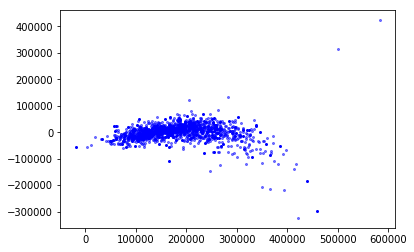

In [53]:
plt.scatter (LR.predict(x_train) , LR.predict(x_train) - y_train, c='b' , s=4 , alpha = .5)
plt.scatter (LR.predict(x_test) , LR.predict(x_test) - y_test, c='b' , s=4 )
plt.hlines(y=0 , xmin=0 , xmax=50)

#plt.plot(x_test, predxTest, color='black', linewidth=1)
#plt.xticks(())
#plt.yticks(())

plt.show()

--------------------------------------------------------------------------------

# # Another Example

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


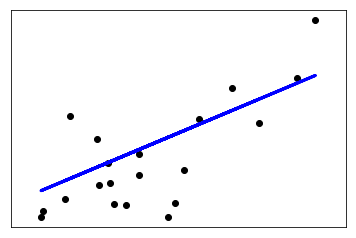

In [29]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
#diabetes = train

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()